In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cardio = pd.read_csv("cardio_train.csv",sep=";")

In [3]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Clean Data
**Check the missing value**

id-0%
age-0%
gender-0%
height-0%
weight-0%
ap_hi-0%
ap_lo-0%
cholesterol-0%
gluc-0%
smoke-0%
alco-0%
active-0%
cardio-0%


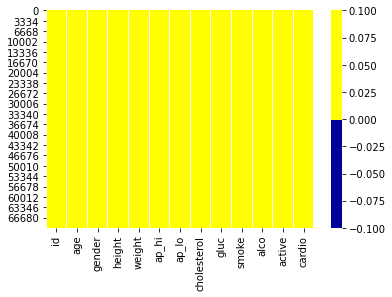

In [4]:
cols = cardio.columns
colours = ['#000099','#ffff00']
sns.heatmap(cardio[cols].isnull(),cmap=sns.color_palette(colours))

for col in cardio.columns:
    pct_missing = np.mean(cardio[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

**Check the data type**

In [5]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
cardio.drop('id', axis='columns', inplace=True)

In [7]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


**Upper the first letter of columns name**

In [8]:
cardio.columns = cardio.columns.str.capitalize()

**Check the duplicate value**

In [9]:
duplicate = cardio[cardio.duplicated()]

In [10]:
print('There is {} duplicated'.format(cardio.duplicated().sum()))
print('There is {}% duplicated'.format(round(cardio.duplicated().sum()/len(cardio['Cardio'])*100,2)))

There is 24 duplicated
There is 0.03% duplicated


**Drop duplicate values**

In [11]:
cardio.drop_duplicates(inplace = True)

In [12]:
duplicates = cardio[cardio.duplicated()]

In [13]:
duplicates.count()

Age            0
Gender         0
Height         0
Weight         0
Ap_hi          0
Ap_lo          0
Cholesterol    0
Gluc           0
Smoke          0
Alco           0
Active         0
Cardio         0
dtype: int64

**Detecting Outliers**

In [14]:
cardio.describe()

,Age,Gender,Height,Weight,Ap_hi,Ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Check the outliers')

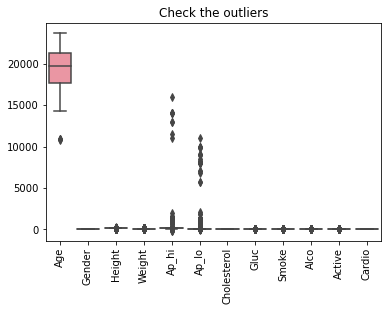

In [15]:
sns.boxplot(data=cardio)
plt.xticks(rotation=90)
plt.title('Check the outliers')

While for diastolic we consider dropping all values bigger than 200 and smaller than 30, and dropping all values bigger than 250 and smaller than 80 for systolic blood pressure. The above is considered that having a diastolic 120 and systolic of 180 is considered hypertensive crisis, for conservative purpose, we set it at 160 and 200.

In [16]:
outlier_bp1= ((cardio["Ap_hi"]>250) | (cardio["Ap_lo"]>160))
outlier_bp2 = ((cardio["Ap_hi"] < 80) | (cardio["Ap_lo"] < 30))

In [17]:
Outlier_filter = (outlier_bp1|outlier_bp2)

In [18]:
cardio_outliers= cardio[Outlier_filter]

In [19]:
print('There is {} outliers'.format(cardio[Outlier_filter]["Cardio"].count()))
print('There is {}% outliers'.format(round(len(cardio[Outlier_filter]["Cardio"])/len(cardio['Cardio'])*100,2)))

There is 1248 outliers
There is 1.78% outliers


In [20]:
cardio = cardio[~outlier_bp1]
cardio = cardio[~outlier_bp2]

<AxesSubplot:>

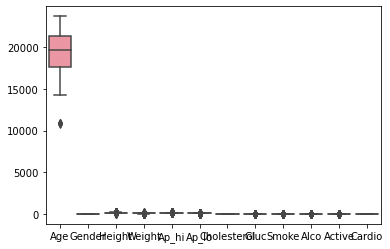

In [21]:
sns.boxplot(data=cardio)

### EDA

In [22]:
corr = cardio.corr()

<AxesSubplot:>

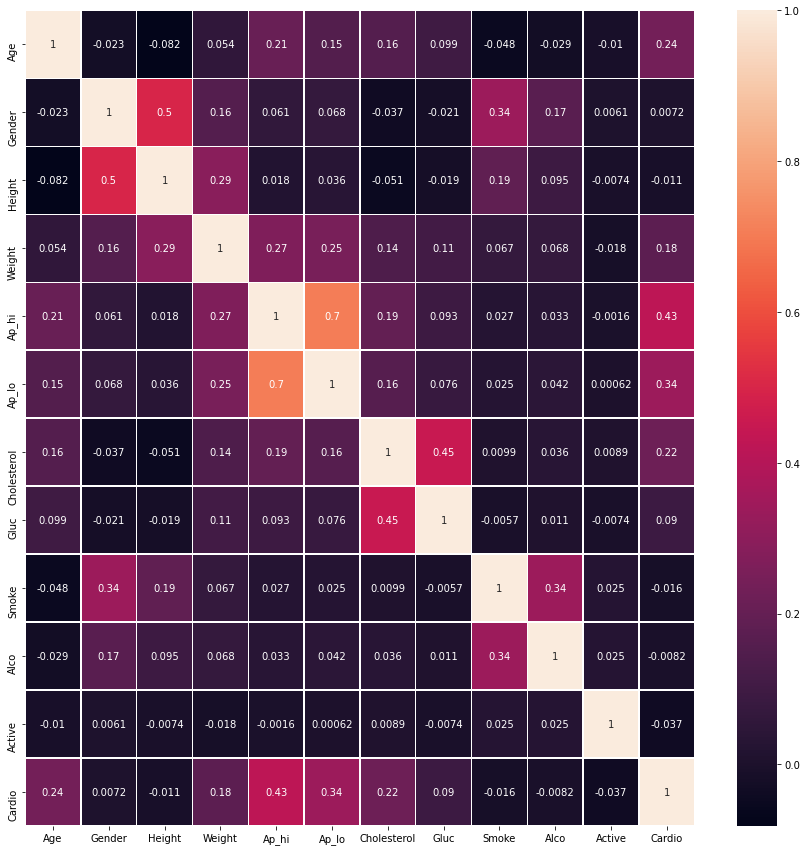

In [23]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=0.5,ax=ax)

In [24]:
cardio['Cardio'].value_counts()

0    34706
1    34022
Name: Cardio, dtype: int64

<AxesSubplot:xlabel='Cardio', ylabel='count'>

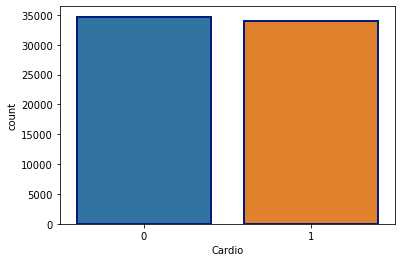

In [25]:
sns.countplot(x='Cardio',data=cardio,linewidth=2,edgecolor=sns.color_palette("dark", 1))

Text(0.5, 1.0, 'Active')

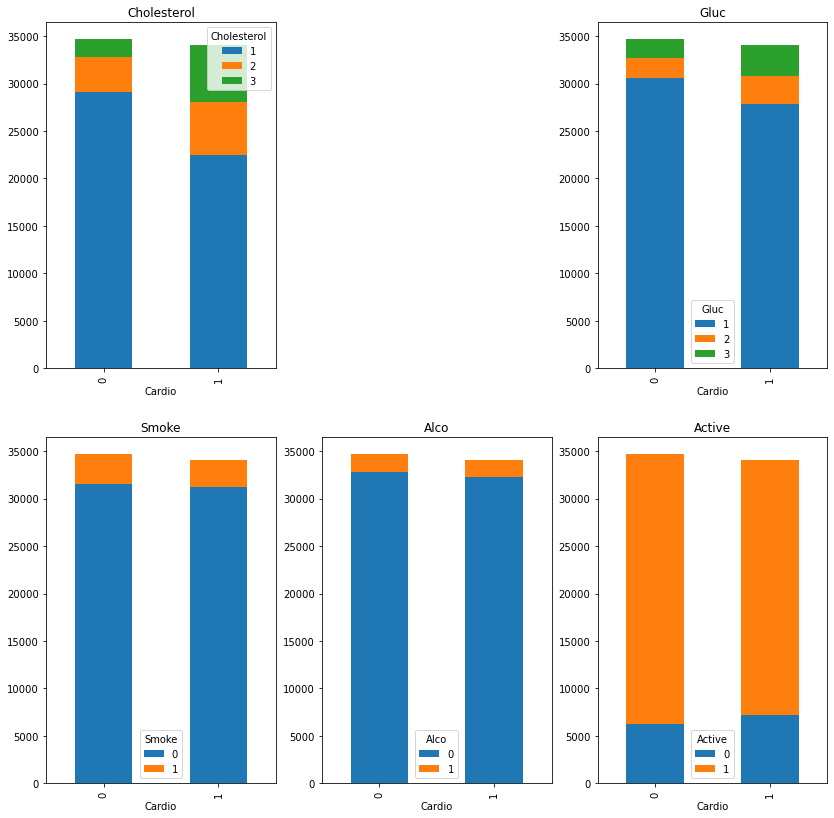

In [26]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)
cardio.groupby(['Cardio','Cholesterol']).size().unstack().plot(kind='bar',stacked=True,ax=ax1)
ax1.set_title('Cholesterol')
cardio.groupby(['Cardio','Gluc']).size().unstack().plot(kind='bar',stacked=True,ax=ax2)
ax2.set_title('Gluc')
cardio.groupby(['Cardio','Smoke']).size().unstack().plot(kind='bar',stacked=True,ax=ax3)
ax3.set_title('Smoke')
cardio.groupby(['Cardio','Alco']).size().unstack().plot(kind='bar',stacked=True,ax=ax4)
ax4.set_title('Alco')
cardio.groupby(['Cardio','Active']).size().unstack().plot(kind='bar',stacked=True,ax=ax5)
ax5.set_title('Active')

<AxesSubplot:xlabel='Gender', ylabel='count'>

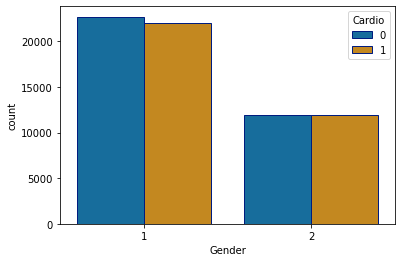

In [27]:
sns.countplot(x='Gender', hue='Cardio', data= cardio, palette='colorblind', edgecolor= sns.color_palette('dark', n_colors=1))

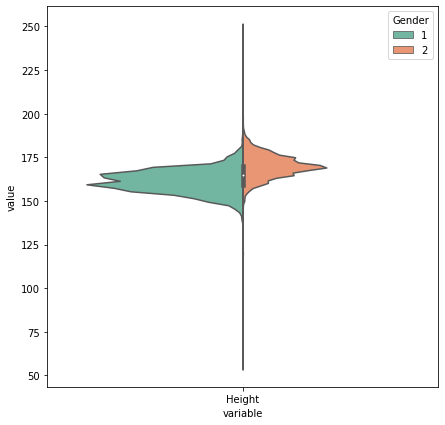

In [28]:
df_melt = pd.melt(frame=cardio, value_vars=['Height'], id_vars=['Gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

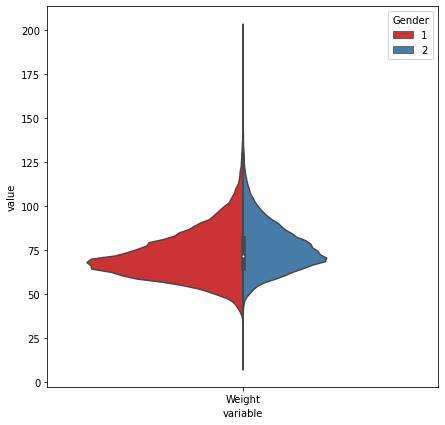

In [29]:
df_melt = pd.melt(frame=cardio, value_vars=['Weight'], id_vars=['Gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

**Change the age from days to years**

In [30]:
cardio['age']=(cardio['Age']/365).round(0)

In [31]:
cardio['age']=pd.to_numeric(cardio['age'],downcast='integer')

<AxesSubplot:xlabel='age', ylabel='count'>

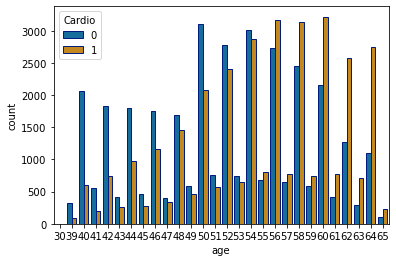

In [32]:
sns.countplot(x='age',hue="Cardio",data= cardio, palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

### Model

In [33]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

<AxesSubplot:xlabel='Weight', ylabel='Density'>

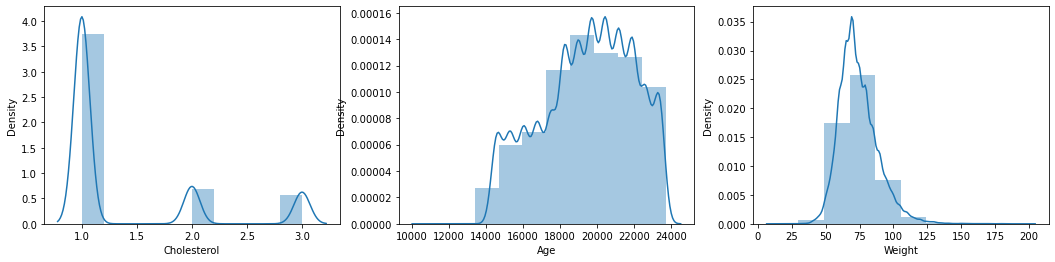

In [34]:
# Distributions of Cholesterol, Age and Weight variables
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.distplot(cardio.Cholesterol, bins=10, kde=True, ax=axes[0])
sns.distplot(cardio.Age, bins=10, kde=True, ax=axes[1])
sns.distplot(cardio.Weight, bins=10, kde=True, ax=axes[2])

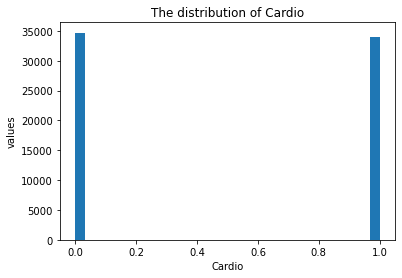

In [35]:
plt.hist(cardio['Cardio'], bins=30) # check the distribution of dependent variable
plt.title('The distribution of Cardio')
plt.xlabel('Cardio')
plt.ylabel('values')
plt.show()

In [36]:
cardio.describe()

,Age,Gender,Height,Weight,Ap_hi,Ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio,age
count,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000,68728.000000
mean,19464.793359,1.348839,164.362560,74.127728,126.629685,81.358951,1.364902,1.225963,0.088028,0.053574,0.803428,0.495024,53.327712
std,2467.984251,0.476606,8.186662,14.333604,16.734809,9.593937,0.679103,0.571929,0.283338,0.225176,0.397409,0.499979,6.767249
min,10798.000000,1.000000,55.000000,11.000000,80.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,160.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [37]:
# use logistic model due to the dependent variable is not normal distribution
cardio_model=cardio.drop(['age'], axis=1)
y_log=cardio_model[['Cardio']]
X_log=cardio_model.drop(['Cardio'], axis=1)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log,y_log, test_size=0.2, random_state=42)


In [38]:
logit_model=sm.Logit(y_train_log,X_train_log)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.578734
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Cardio   No. Observations:                54982
Model:                          Logit   Df Residuals:                    54971
Method:                           MLE   Df Model:                           10
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                  0.1650
Time:                        10:53:56   Log-Likelihood:                -31820.
converged:                       True   LL-Null:                       -38107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age          8.222e-05   3.83e-06     21.487      0.000    7.47e-05    8.97e-05
Gender          0.3305    

In [39]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_log, y_train_log)
y_pred_log=logistic_regression.predict(X_test_log)

In [40]:
confusion_matrix(y_test_log, y_pred_log)
print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       0.68      0.75      0.72      6897
           1       0.72      0.65      0.68      6849

    accuracy                           0.70     13746
   macro avg       0.70      0.70      0.70     13746
weighted avg       0.70      0.70      0.70     13746



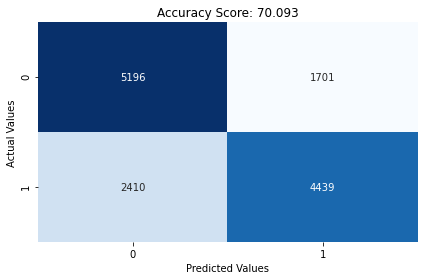

In [41]:
accuracy=metrics.accuracy_score(y_test_log['Cardio'], y_pred_log)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_log, y_pred_log)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(round(accuracy*100, 3), size = 15))
plt.tight_layout()
plt.show()

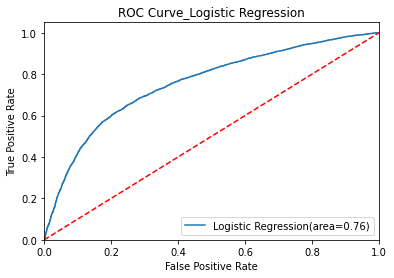

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_log, logistic_regression.predict_proba(X_test_log)[:,1])
fpr,tpr,thresholds = roc_curve(y_test_log, logistic_regression.predict_proba(X_test_log)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve_Logistic Regression')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

The previous results show that the relationship between cholesterol and cardiovascular disease is the most significant. Because weight and height have nothing to do with cardiovascular disease. Therefore, we decided to use height and weight to increase the BMI variable, which is the body fat rate, which has a certain correlation with cholesterol.
Body Mass Index (BMI) is a person's weight in kilograms divided by the square of height in meters. A high BMI can be an indicator of high body fatness. 

In [43]:
def bmi(w,h):# using bmi formula
    return w/(h/100)**2
cardio['BMI']= bmi(cardio['Weight'],cardio['Height'])

In [44]:
cardio.head()

,Age,Gender,Height,Weight,Ap_hi,Ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio,age,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177


Determine whether gender 1 and 2 in the data represent female or male respectively.
Considering that the average height of men in the same area is higher than that of women.

In [45]:
# Using mean to distinguish gender
a = cardio[cardio['Gender']==1]['Height'].mean()
b = cardio[cardio['Gender']==2]['Height'].mean()
if a > b:
    Gender = 'Male'
    Gender2 = 'Female'
else:
    Gender = 'Famale'
    Gender2 = 'Male'
print('Gender:1 is ' + Gender+ ' & Gender:2 is '+ Gender2)


Gender:1 is Famale & Gender:2 is Male


We did not change other categorical code to one hot encoding because they express really hierarchical size

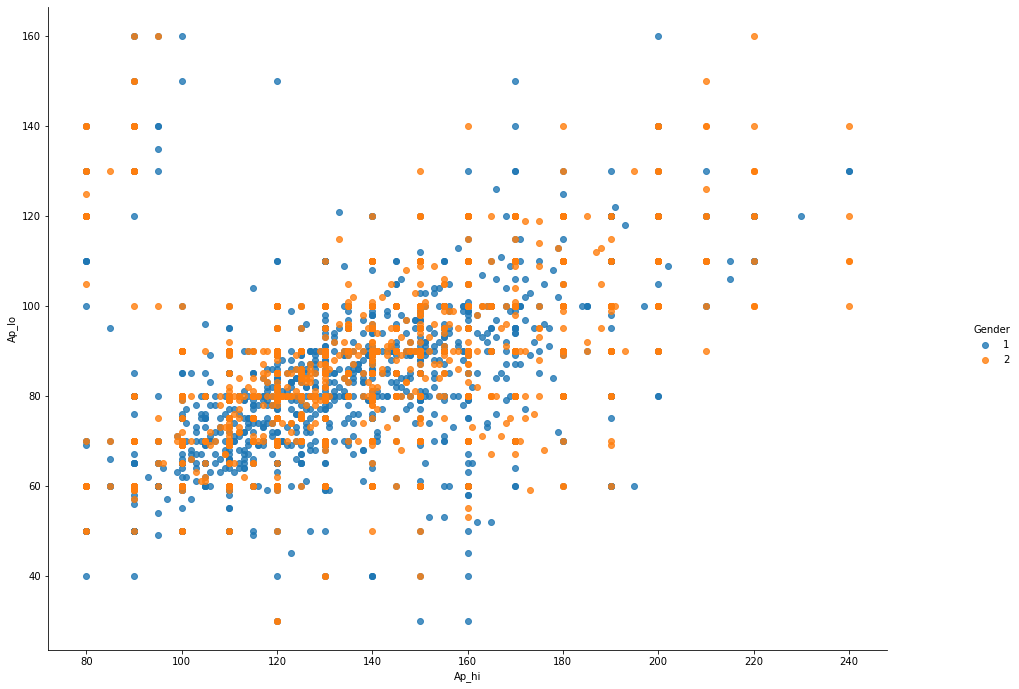

In [46]:
sns.lmplot('Ap_hi','Ap_lo',cardio,hue='Gender',fit_reg=False)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

From the above scatter chart, it is found that the blood pressure is not much different in gender. At the same time, from the previous logistic regression results, these two variables have little effect on cardiovascular diseases. Therefore, we decided not to add the blood pressure variable to affect the future the accuracy of the model.

In [47]:
# Let make Male is '0',Female is '1'.
cardio['Gender']=cardio['Gender'] % 2

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

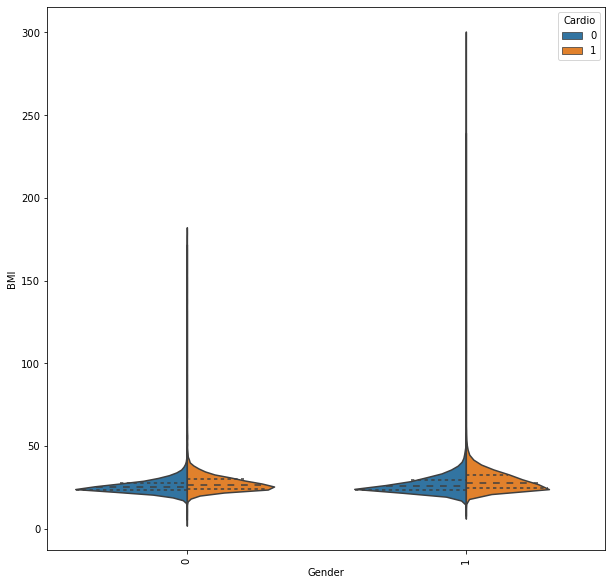

In [48]:
# ispect BMI whether affect cardio disease
plt.figure(figsize=(10,10))
sns.violinplot(x='Gender',y='BMI',hue='Cardio',data=cardio,split=True,inner='quart')
plt.xticks(rotation=90)

In [49]:
# use logistic regression with new variable
cardio_model_new=cardio.drop(['age'], axis=1)
y_Log=cardio_model_new[['Cardio']]
X_Log=cardio_model_new.drop(['Cardio'], axis=1)
X_train_Log, X_test_Log,y_train_Log,y_test_Log=train_test_split(X_Log,y_Log,test_size=0.2, random_state=42)

In [50]:
logit_model=sm.Logit(y_train_Log,X_train_Log,random_state=42)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.564706
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Cardio   No. Observations:                54982
Model:                          Logit   Df Residuals:                    54970
Method:                           MLE   Df Model:                           11
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                  0.1852
Time:                        10:53:57   Log-Likelihood:                -31049.
converged:                       True   LL-Null:                       -38107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.0001   4.11e-06     31.807      0.000       0.000       0.000
Gender         -0.0947    

In [51]:
LR = LogisticRegression()
LR.fit(X_train_Log,y_train_Log)

LogisticRegression()

In [52]:
accuracy_LR = round(LR.score(X_train_Log, y_train_Log) * 100, 2)
print(accuracy_LR)
LRy_pred = LR.predict(X_test_Log)
accuracy_test_LR = round(metrics.accuracy_score(y_test_Log['Cardio'],LRy_pred) * 100, 2)
print(accuracy_test_LR)

71.88
72.06


In [53]:
confusion_matrix(y_test_Log,LRy_pred)
print(classification_report(y_test_Log,LRy_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6897
           1       0.75      0.66      0.70      6849

    accuracy                           0.72     13746
   macro avg       0.72      0.72      0.72     13746
weighted avg       0.72      0.72      0.72     13746



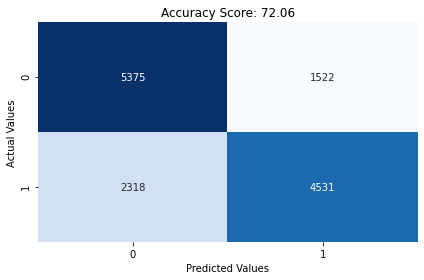

In [54]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_Log,LRy_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(accuracy_test_LR, size = 15))
plt.tight_layout()
plt.show()

In [55]:
from sklearn.feature_selection import RFE
# select 5 best features using Recursive Feature Elimination
names=cardio.drop(['Age','Cardio'],axis=1)
rfe=RFE(LR, 1)
fit_Log=rfe.fit(X_train_Log,y_train_Log)

print('Features sorted by their rank:')
print(sorted(zip(map(lambda x:round(x,4),fit_Log.ranking_),names.columns)))

Features sorted by their rank:
[(1, 'Gluc'), (2, 'Active'), (3, 'Alco'), (4, 'Smoke'), (5, 'Ap_lo'), (6, 'Height'), (7, 'Weight'), (8, 'BMI'), (9, 'age'), (10, 'Ap_hi'), (11, 'Cholesterol'), (12, 'Gender')]


### Complex Algorithms
**Random Forests**

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 

rfb = RandomForestClassifier(n_jobs=-1,max_features='sqrt',n_estimators=50,oob_score=True,random_state=42)
rfb.fit(X_train_Log,y_train_Log)

RandomForestClassifier(max_features='sqrt', n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=42)

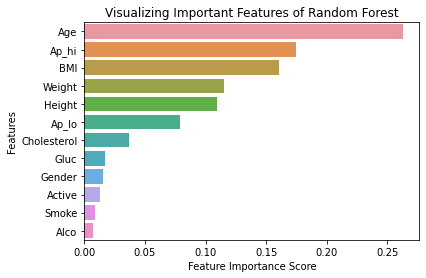

In [59]:
#cardio_feature = cardio.drop(['age','Cardio'],axis=1)
feature_imp = pd.Series(rfb.feature_importances_, index = X_Log.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features of Random Forest")
plt.show()

In [ ]:
RFy_pred = rfb.predict(X_test_Log)
accuracy_rf_train = round(metrics.accuracy_score(y_train_Log, rfb.predict(X_train_Log)) * 100, 2)
accuracy_rf_test = round(metrics.accuracy_score(y_test_Log,RFy_pred) * 100, 2)
print("Training Accuracy:",accuracy_rf_train)
print("Testing Accuracy:",accuracy_rf_test)

In [ ]:
param_grid={'n_estimators':[900,1000,1100],'max_depth':[3,4,5]}
random_forest=GridSearchCV(estimator=rfb,param_grid=param_grid,cv=5)
random_forest.fit(X_train_Log, y_train_Log)

In [ ]:
accuracy_random_forest = round(random_forest.score(X_train_Log, y_train_Log) * 100, 2)
print(accuracy_random_forest,random_forest.best_params_)
accuracy_test_random_forest = round(random_forest.score(X_test_Log,y_test_Log) * 100, 2)
accuracy_test_random_forest

In [ ]:
rfy_pred=random_forest.predict(X_test_Log)
confusion_matrix(y_test_Log, rfy_pred)
print(classification_report(y_test_Log, rfy_pred))

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_Log, rfy_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(accuracy_test_random_forest, size = 15))
plt.tight_layout()
plt.show()

**Gradient Boosting**

In [ ]:
gb_model= GradientBoostingClassifier()
gb_model.fit(X_train_Log,y_train_Log)
gby_pred = gb_model.predict(X_test_Log)
gbroc_auc = round(roc_auc_score(y_test_Log, gby_pred),4)
print("Training Accuracy: ",round(metrics.accuracy_score(y_train_Log, gb_model.predict(X_train_Log)) * 100, 2))
print("Testing Accuracy: ",round(metrics.accuracy_score(y_test_Log, gby_pred) * 100, 2))
print("ROC socre:",gbroc_auc)

In [ ]:
gbfeature_imp = pd.Series(gb_model.feature_importances_, index = cardio_feature.columns).sort_values(ascending=False)
sns.barplot(x=gbfeature_imp,y=gbfeature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features of Gradient Boosting")
plt.show()

In [ ]:
target_name = 'Cardio'
cardio_target = cardio[target_name]
cardio = cardio.drop(['Cardio','age'], axis=1)

In [ ]:
train, test, target, target_test = train_test_split(cardio, cardio_target, test_size=0.2, random_state=0)

In [ ]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)

In [ ]:
from hyperopt import hp,tpe,fmin,space_eval

In [ ]:
def hyperopt_gb_score(params):
    clf = GradientBoostingClassifier(**params,random_state=42)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', np.arange(1000,1800, dtype=int)),
            "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
            'max_depth': hp.choice('max_depth', np.arange(2, 5, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

In [ ]:
params = space_eval(space_gb, best)
params

In [ ]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(**params)
gradient_boosting.fit(train, target)
acc_gradient_boosting = round(gradient_boosting.score(train, target) * 100, 2)
acc_gradient_boosting

In [ ]:
acc_test_gradient_boosting = round(gradient_boosting.score(test, target_test) * 100, 2)
acc_test_gradient_boosting

In [ ]:
confusion_matrix(target_test, gradient_boosting.predict(test))
print(classification_report(target_test, gradient_boosting.predict(test)))
sns.heatmap(pd.DataFrame(confusion_matrix(target_test, gradient_boosting.predict(test))), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(acc_test_gradient_boosting, size = 15))
plt.tight_layout()
plt.show()

In [ ]:
Logit_roc_auc = roc_auc_score(y_test_Log, LR.predict_proba(X_test_Log)[:,1])
fpLR,tpLR,thresholdsLR = roc_curve(y_test_Log, LR.predict_proba(X_test_Log)[:,1])
random_forest_roc_auc = roc_auc_score(y_test_Log, random_forest.predict_proba(X_test_Log)[:,1])
fprrf,tprrf,thresholdsrf = roc_curve(y_test_Log, random_forest.predict_proba(X_test_Log)[:,1])
gradient_boosting_roc_auc = roc_auc_score(y_test_Log, gb_model.predict_proba(X_test_Log)[:,1])
fprgb,tprgb,thresholdsgb = roc_curve(y_test_Log, gb_model.predict_proba(X_test_Log)[:,1])
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpLR,tpLR,label='Logistic Regression(area=%0.2f)'% Logit_roc_auc)
plt.plot(fprrf, tprrf, label= 'Random Forest(area=%0.2f)'% random_forest_roc_auc)
plt.plot(fprgb, tprgb, label= 'Gradient Boosting(area=%0.2f)'% gradient_boosting_roc_auc)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()